In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
moe_data = pd.read_csv('moe_data/moe_data.csv', header=None)

In [3]:
moe_data.shape

(2561, 1230)

In [4]:
healthy_df = moe_data[moe_data.iloc[:,0] == 3]
transient_df = moe_data[moe_data.iloc[:,0] == 1]
sag_df = moe_data[moe_data.iloc[:,0] == 2]

In [5]:
print(healthy_df.shape, transient_df.shape, sag_df.shape)

(501, 1230) (1185, 1230) (875, 1230)


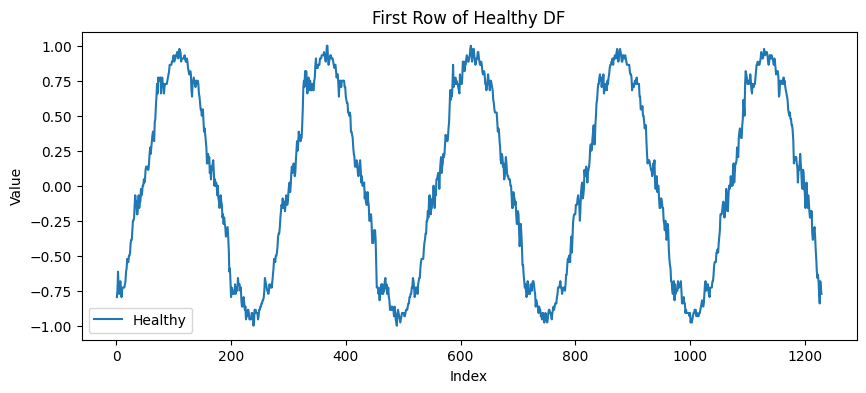

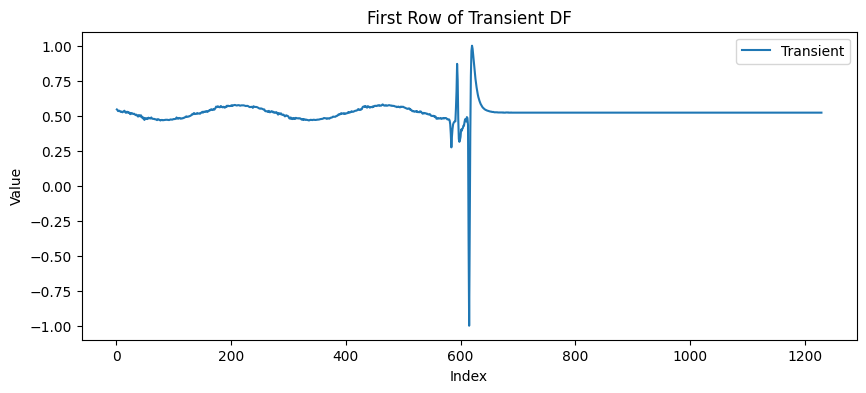

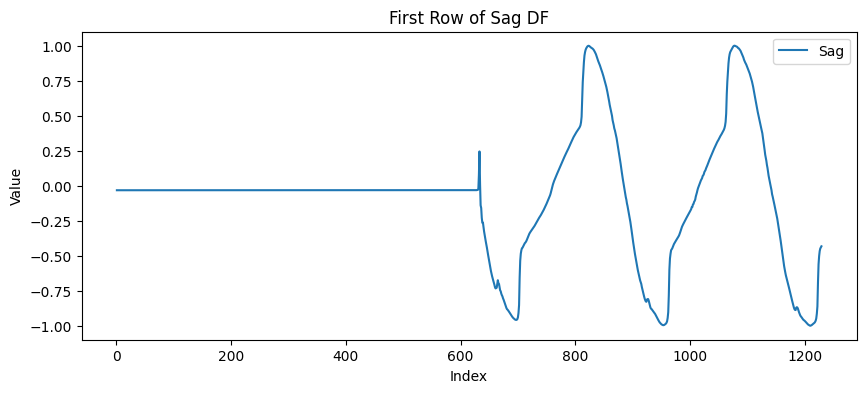

In [6]:
# Plot the first row of healthy_df
plt.figure(figsize=(10, 4))
plt.plot(healthy_df.iloc[0, 1:], label='Healthy')
plt.title('First Row of Healthy DF')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot the first row of transient_df
plt.figure(figsize=(10, 4))
plt.plot(transient_df.iloc[0, 1:], label='Transient')
plt.title('First Row of Transient DF')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot the first row of sag_df
plt.figure(figsize=(10, 4))
plt.plot(sag_df.iloc[0, 1:], label='Sag')
plt.title('First Row of Sag DF')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [7]:
healthy_df = healthy_df.iloc[:, ::2]
transient_df = transient_df.iloc[:, ::2]
sag_df = sag_df.iloc[:, ::2]

In [8]:
print(healthy_df.shape, transient_df.shape, sag_df.shape)

(501, 615) (1185, 615) (875, 615)


In [9]:
import pickle
with open('normalised_healthy_df.pkl', 'wb') as f:
    pickle.dump(healthy_df, f)

with open('normalised_subcycledist_df.pkl', 'wb') as f:
    pickle.dump(transient_df, f)

with open('normalised_sag_df.pkl', 'wb') as f:
    pickle.dump(sag_df, f)

In [11]:
healthy_df.head()

,0,2,4,6,8,10,12,14,16,18,...,1210,1212,1214,1216,1218,1220,1222,1224,1226,1228
2060,3,-0.750000,-0.727273,-0.727273,-0.727273,-0.750000,-0.727273,-0.727273,-0.681818,-0.590909,...,-0.181818,-0.181818,-0.386364,-0.318182,-0.363636,-0.522727,-0.659091,-0.681818,-0.840909,-0.727273
2061,3,-0.657658,-0.657658,-0.675676,-0.657658,-0.639640,-0.603604,-0.585586,-0.639640,-0.621622,...,0.225225,0.243243,0.225225,0.225225,0.171171,0.171171,0.117117,-0.225225,-0.063063,-0.027027
2062,3,-0.611111,-0.592593,-0.555556,-0.462963,-0.481482,-0.500000,-0.425926,-0.388889,-0.296296,...,-0.444444,-0.500000,-0.555556,-0.648148,-0.574074,-0.592593,-0.629630,-0.648148,-0.592593,-0.574074
2063,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2064,3,0.140078,0.083127,0.031836,-0.018040,-0.066502,-0.112133,-0.158118,-0.207287,-0.263530,...,0.941281,0.960028,0.977007,0.989742,0.992572,0.995401,0.997878,0.999293,0.999646,0.998231


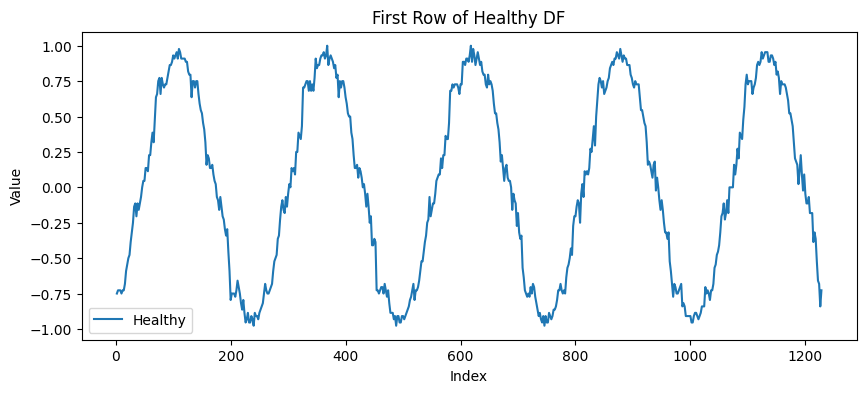

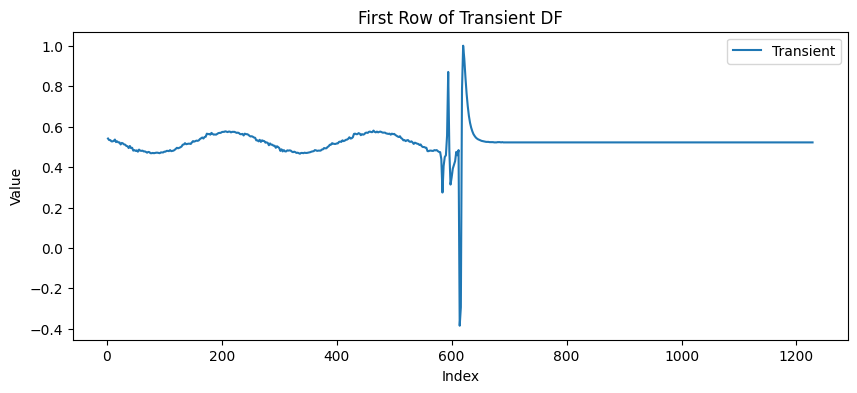

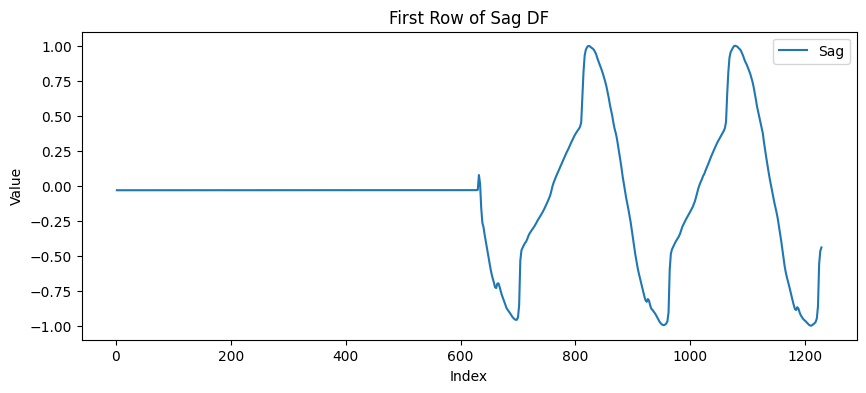

In [8]:
# Plot the first row of healthy_df
plt.figure(figsize=(10, 4))
plt.plot(healthy_df.iloc[0, 1:], label='Healthy')
plt.title('First Row of Healthy DF')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot the first row of transient_df
plt.figure(figsize=(10, 4))
plt.plot(transient_df.iloc[0, 1:], label='Transient')
plt.title('First Row of Transient DF')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot the first row of sag_df
plt.figure(figsize=(10, 4))
plt.plot(sag_df.iloc[0, 1:], label='Sag')
plt.title('First Row of Sag DF')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [9]:
print(healthy_df.shape, transient_df.shape, sag_df.shape)

(501, 615) (1185, 615) (875, 615)


In [10]:
print("Does healthy_df contain NaN values?", healthy_df.isnull().values.any())
print("Does transient_df contain NaN values?", transient_df.isnull().values.any())
print("Does sag_df contain NaN values?", sag_df.isnull().values.any())

Does healthy_df contain NaN values? False
Does transient_df contain NaN values? False
Does sag_df contain NaN values? False


In [11]:
# Combine the three dataframes by rows
# Take 50 random rows from each dataframe for training
train_healthy = healthy_df.sample(n=50, random_state=42)
train_transient = transient_df.sample(n=50, random_state=42)
train_sag = sag_df.sample(n=50, random_state=42)
KentuckyUPS_TRAIN_df = pd.concat([train_healthy, train_transient, train_sag], axis=0)

# Take 20 random rows from each dataframe for testing
test_healthy = healthy_df.sample(n=20, random_state=24)
test_transient = transient_df.sample(n=20, random_state=24)
test_sag = sag_df.sample(n=20, random_state=24)
KentuckyUPS_TEST_df = pd.concat([test_healthy, test_transient, test_sag], axis=0)

# Shuffle the dataframe across rows
# nstsc_df = nstsc_df.sample(frac=1).reset_index(drop=True)

# Export the dataframe to a CSV file with no headers
KentuckyUPS_TRAIN_df.to_csv('KentuckyUPS_TRAIN.tsv',sep = '\t' ,index=False, header=False)
KentuckyUPS_TEST_df.to_csv('KentuckyUPS_TEST.tsv',sep = '\t' ,index=False, header=False)

In [ ]:
# Combine the three dataframes by rows
# Take 50 random rows from each dataframe for training
train_healthy = healthy_df.sample(n=50, random_state=42)
train_transient = transient_df.sample(n=50, random_state=42)
train_sag = sag_df.sample(n=50, random_state=42)
KentuckyUPS_TRAIN_df = pd.concat([train_healthy, train_transient, train_sag], axis=0)

# Take 20 random rows from each dataframe for testing
test_healthy = healthy_df.sample(n=20, random_state=24)
test_transient = transient_df.sample(n=20, random_state=24)
test_sag = sag_df.sample(n=20, random_state=24)
KentuckyUPS_TEST_df = pd.concat([test_healthy, test_transient, test_sag], axis=0)

# Shuffle the dataframe across rows
# nstsc_df = nstsc_df.sample(frac=1).reset_index(drop=True)

# Export the dataframe to a CSV file with no headers
KentuckyUPS_TRAIN_df.to_csv('KentuckyUPS_TRAIN.tsv',sep = '\t' ,index=False, header=False)
KentuckyUPS_TEST_df.to_csv('KentuckyUPS_TRAIN.tsv',sep = '\t' ,index=False, header=False)